In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
dp=pd.read_csv('C:\\Users\\hp\\Desktop\\FODS_2\\FODS-A2.csv')

In [3]:
def insert_ones(X):
    n=len(X)
    X.insert(0,"X0",1,allow_duplicates=False)
    return X

In [4]:
def calc_weights(X,y):
    
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    X_train=insert_ones(X_train)
    X_test=insert_ones(X_test)
    
    weights=np.ones((X_train.shape[1],1))
    prod=np.dot(X_train.transpose(),X_train)
    inv_mat=np.linalg.inv(prod)
    prod_1=np.dot(inv_mat,X_train.transpose())
    weights=np.dot(prod_1,y_train)
    
    return weights

In [5]:
def model_train_error(X,y,weights):
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    X_train=insert_ones(X_train)
    X_test=insert_ones(X_test)
    n=len(X_train)
    err=(1/(2*n))*np.sum(np.square(y_train-np.dot(X_train,weights)))
    return err

In [6]:
def model_test_error(X,y,weights):
    X=(X-X.mean())/X.std()
    y=(y-y.mean())/y.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90,shuffle=True)
    X_train=insert_ones(X_train)
    X_test=insert_ones(X_test)
    n=len(X_test)
    err=(1/(2*n))*np.sum(np.square(y_test-np.dot(X_test,weights)))
    return err

In [7]:
corr_output=[]

In [8]:
correlation=abs(dp.corr(method='pearson')['Appliances']).sort_values(ascending=False)[1:]
desc_list=list(dp[correlation[:].index].columns)
desc_list
#print(correlation)

['RH_out',
 'T6',
 'T2',
 'T_out',
 'RH_8',
 'Windspeed',
 'RH_6',
 'T3',
 'RH_1',
 'RH_2',
 'RH_7',
 'RH_9',
 'T1',
 'T4',
 'T8',
 'Press_mm_hg',
 'RH_3',
 'T7',
 'RH_4',
 'T5',
 'RH_5',
 'Tdewpoint',
 'Visibility',
 'T9',
 'rv1',
 'rv2']

In [9]:
for i in range(0,26):
    X=dp[desc_list[0:i]]
    y=dp['Appliances']
    weights=calc_weights(X,y)
    print("Final weights for ",i+1," set of features are:" ,weights)
    train_error=model_train_error(X,y,weights)
    test_error=model_test_error(X,y,weights)
    print("The Training error for ",i+1, " set of features is:", train_error)
    print("The Testing error for ",i+1," set of features is:", test_error)
    print("\n")
    corr_output.append((i+1,train_error,test_error))

Final weights for  1  set of features are: [0.00763054]
The Training error for  1  set of features is: 0.5161983906419102
The Testing error for  1  set of features is: 0.435045584200114


Final weights for  2  set of features are: [ 0.00823922 -0.15159107]
The Training error for  2  set of features is: 0.5047583890249253
The Testing error for  2  set of features is: 0.41861580018474887


Final weights for  3  set of features are: [ 0.00825982 -0.12572099  0.04558969]
The Training error for  3  set of features is: 0.5040575030060729
The Testing error for  3  set of features is: 0.41901002673361226


Final weights for  4  set of features are: [ 0.0082718  -0.1243699   0.0271281   0.02385251]
The Training error for  4  set of features is: 0.5039595021983706
The Testing error for  4  set of features is: 0.41864686977769416


Final weights for  5  set of features are: [ 0.00775485 -0.13265951  0.34642308  0.0326884  -0.33924217]
The Training error for  5  set of features is: 0.5011952429489

In [10]:
corr_output

[(1, 0.5161983906419102, 0.435045584200114),
 (2, 0.5047583890249253, 0.41861580018474887),
 (3, 0.5040575030060729, 0.41901002673361226),
 (4, 0.5039595021983706, 0.41864686977769416),
 (5, 0.5011952429489966, 0.4155454055821127),
 (6, 0.5011103732795803, 0.41543052349683496),
 (7, 0.4982705370308556, 0.4096489010984319),
 (8, 0.494084852280743, 0.4064673019912185),
 (9, 0.4878638377633323, 0.39668634961631655),
 (10, 0.4761388049452199, 0.3773942581342294),
 (11, 0.46120952228596435, 0.3629324684218579),
 (12, 0.4606259115815621, 0.3619241130776412),
 (13, 0.4600949368383267, 0.3621205925888675),
 (14, 0.45955342604782834, 0.3617041397883171),
 (15, 0.4590336546262477, 0.3611873550594697),
 (16, 0.45880262672210276, 0.3615063136310717),
 (17, 0.45870535844993027, 0.3610190260133803),
 (18, 0.4571150655018023, 0.3557758704396118),
 (19, 0.4547414154724835, 0.35331723903952583),
 (20, 0.4542101518168325, 0.35237346344077247),
 (21, 0.4532891660965266, 0.35326707109546823),
 (22, 0.4525

In [11]:
corr_output=pd.DataFrame(corr_output)

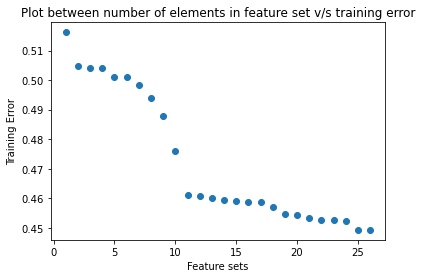

In [12]:
plt.scatter(corr_output[0],corr_output[1])
plt.xlabel("Feature sets")
plt.ylabel("Training Error")
plt.title("Plot between number of elements in feature set v/s training error")
plt.show()

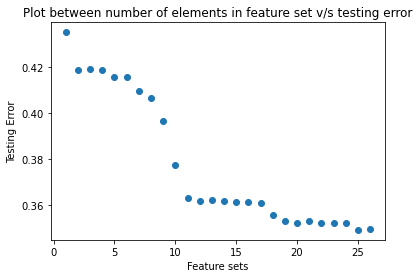

In [13]:
plt.scatter(corr_output[0],corr_output[2])
plt.xlabel("Feature sets")
plt.ylabel("Testing Error")
plt.title("Plot between number of elements in feature set v/s testing error")
plt.show()